In [1]:
import pandas as pd
import numpy as np

In [2]:
bons=pd.read_csv('dados_alterados_pos_filtragens.csv').set_index('measurement')
bons['timestamp']= pd.to_datetime(bons['timestamp']) 
bons['period']=pd.to_timedelta(bons['period'])

In [48]:
bons.reset_index().measurement.value_counts().head(60)

3023     2991
3014     2944
10738    1782
10394    1718
5076     1717
10880    1377
3013     1290
13030    1269
3218     1223
2956     1200
13037    1181
8614     1123
10324    1116
12827     965
4765      961
1356      947
10385     936
11883     913
3378      908
12669     882
11251     871
1401      863
2851      832
5565      823
6739      822
1572      805
4694      801
12980     792
3360      790
3243      743
12954     708
7030      687
9761      679
3134      674
173       670
11254     664
4390      649
1573      649
12950     647
1420      646
1989      640
8519      634
1560      633
1986      624
89        618
4735      614
9872      606
8137      603
5357      590
6515      572
5083      570
12866     569
5084      563
5224      547
10371     542
3651      523
3005      519
8592      513
2952      507
9937      505
Name: measurement, dtype: int64

In [37]:
contagens=bons.reset_index().measurement.value_counts().to_frame().reset_index().rename(columns={"index": "measurement", "measurement": "amostras"}).set_index('measurement')

In [43]:
contagens.amostras.value_counts().head(50)#.value_counts()#.sortValues(amostras)

9     156
10    143
8     139
11    122
12    118
13    109
15     99
14     78
7      74
16     71
17     50
19     48
20     46
18     40
23     36
21     34
22     32
24     32
25     31
56     25
26     24
46     23
43     22
45     21
29     21
38     21
47     21
60     21
66     20
59     20
80     20
34     20
65     18
62     18
68     18
36     18
37     18
31     18
73     17
35     17
30     16
57     16
32     16
27     16
44     16
78     16
72     16
74     15
76     15
69     15
Name: amostras, dtype: int64

Text(0.5, 1.0, 'Weighing 12980')

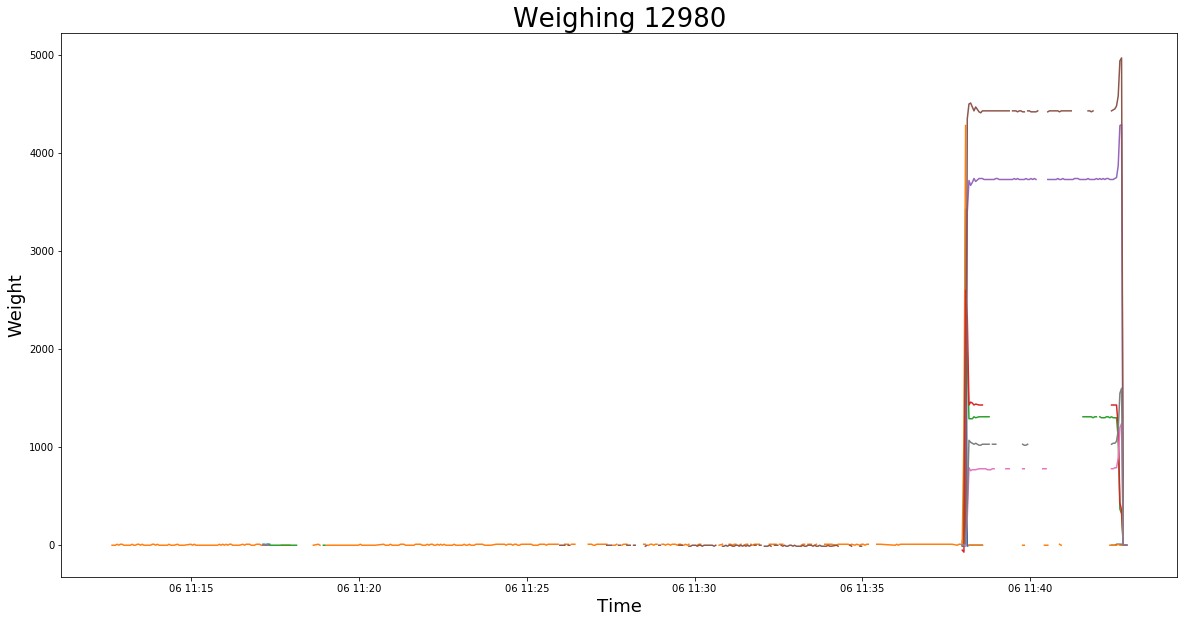

In [49]:
# PROCURAR UM MAU
dados=bons.loc[9937]
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(dados.timestamp, dados[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])#, 'g')
#plt.legend(['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Weight', fontsize=18)
plt.title('Weighing 12980', fontsize=26)

Text(0.5, 1.0, 'Weighing 12980')

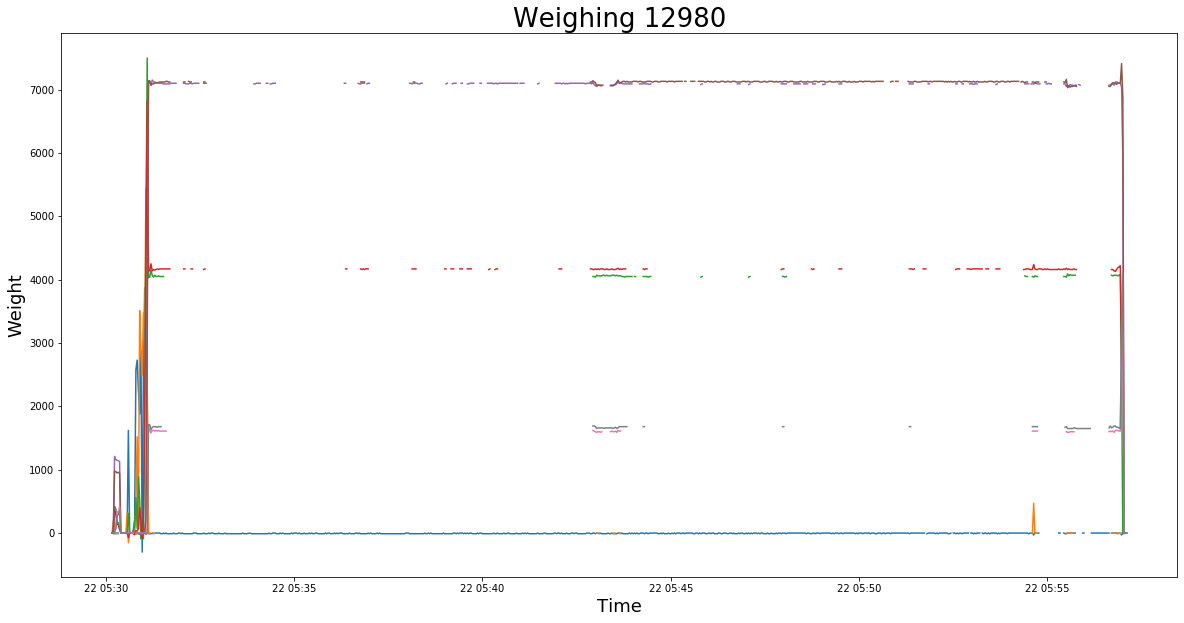

In [4]:
dados=bons.loc[12980]
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(dados.timestamp, dados[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])#, 'g')
#plt.legend(['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Weight', fontsize=18)
plt.title('Weighing 12980', fontsize=26)

### Manutençao:
- se a celula nao desliga?

### Anomalia:
- identificar/comparar trends
- comparar 2 series
    - Chow test
    - t-test
    - covariancia/correlaçao
    - wilcoxon rank sum test

Duas series comparaveis (BOAS)

13076 / 13085

Text(0, 0.5, 'Weight')

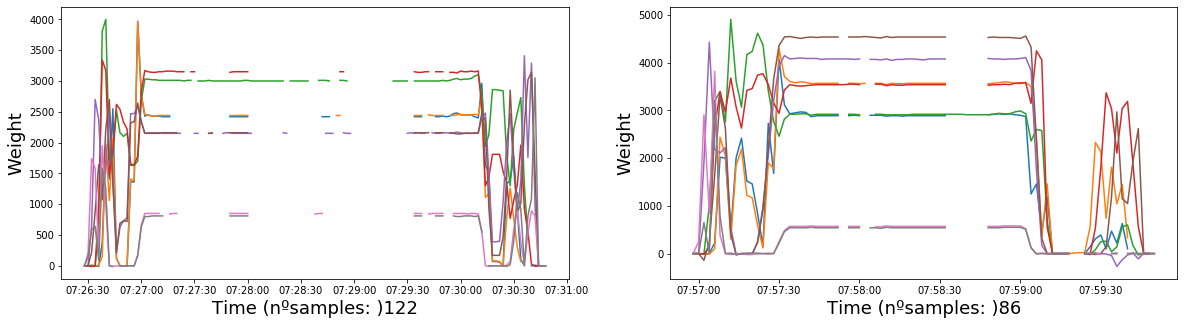

In [5]:
#teste=bons.loc[3023]#[2500:2900]
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))

teste=bons.loc[13076]
plt.subplot(1, 2, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)


teste=bons.loc[13085]
plt.subplot(1, 2, 2)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)


In [3]:
bons_interpolados=pd.concat([bons.reset_index().groupby('measurement').fillna(method='ffill'), bons.reset_index()['measurement']], axis=1, sort=False).set_index('measurement')

Text(0, 0.5, 'Weight')

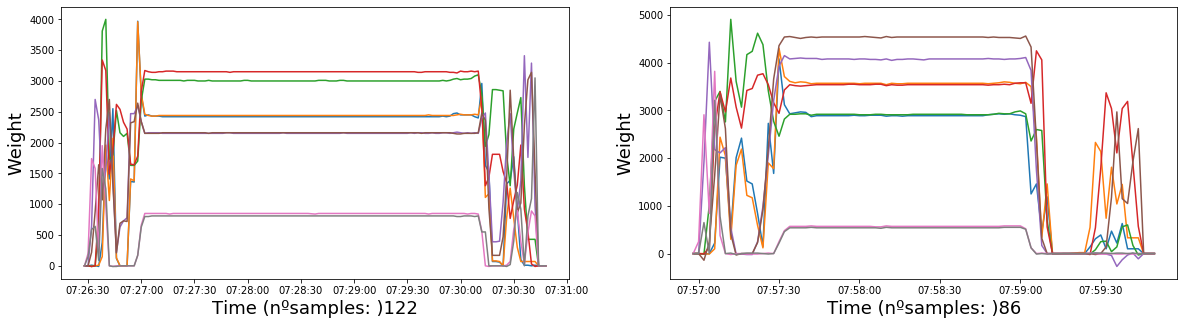

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))

teste=bons_interpolados.loc[13076]
plt.subplot(1, 2, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)


teste=bons_interpolados.loc[13085]
plt.subplot(1, 2, 2)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)

Text(0, 0.5, 'Weight')

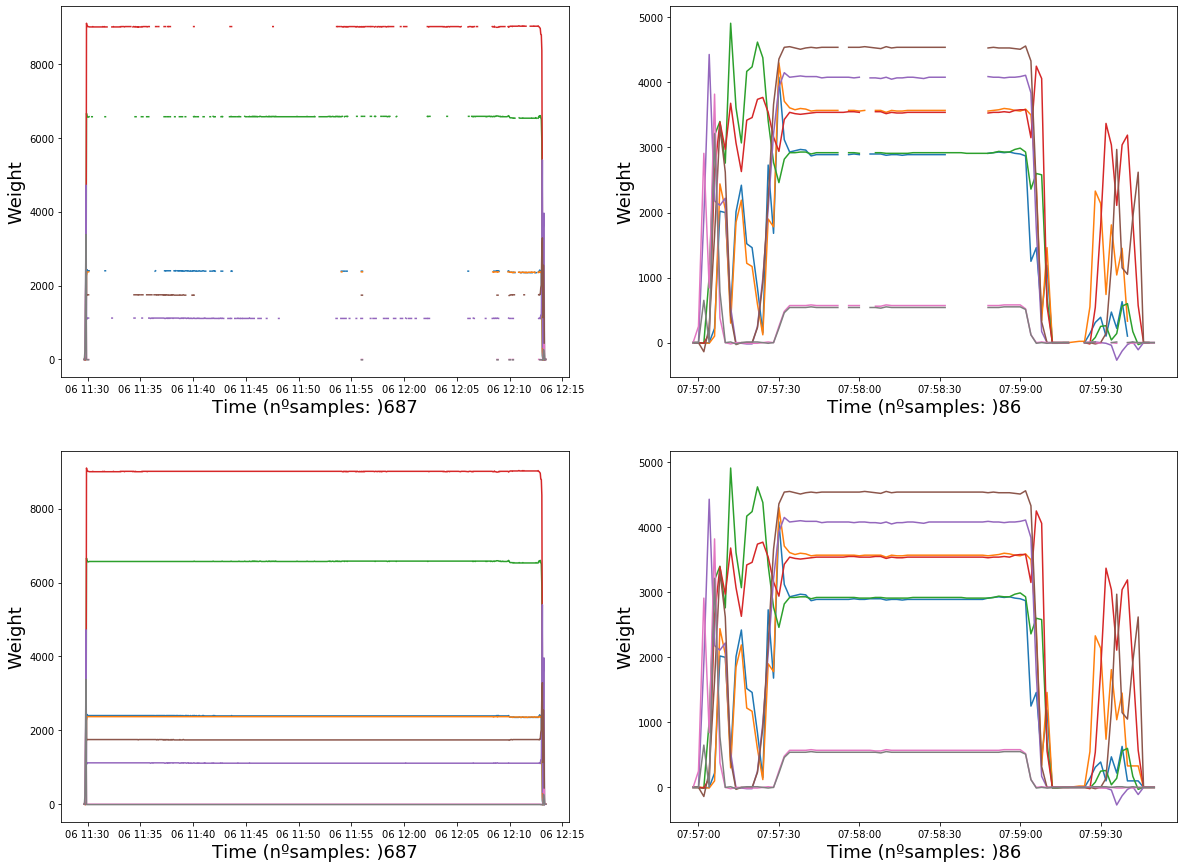

In [54]:
fig = plt.figure(figsize=(20,15))

teste=bons.loc[7030]#[:50]
plt.subplot(2, 2, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)


teste=bons.loc[13085]
plt.subplot(2, 2, 2)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)

teste=bons_interpolados.loc[7030]#[:50]
plt.subplot(2, 2, 3)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)


teste=bons_interpolados.loc[13085]
plt.subplot(2, 2, 4)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)

Text(0.5, 1.0, 'Weighing 7030 Crop')

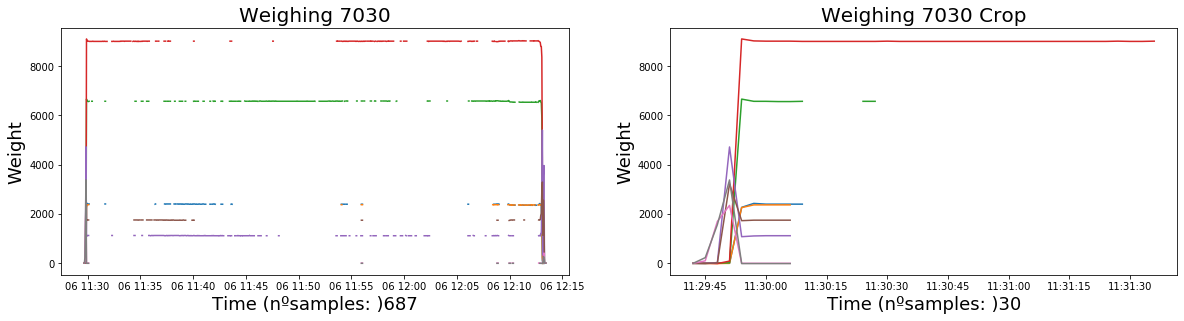

In [59]:
fig = plt.figure(figsize=(20,10))

teste=bons.loc[7030]#[:50]
plt.subplot(2, 2, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)
plt.title('Weighing 7030', fontsize=20)

teste=bons.loc[7030][:30]
plt.subplot(2, 2, 2)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
plt.title('Weighing 7030 Crop', fontsize=20)

import seaborn as sns#; sns.set_theme(color_codes=True)
#iris = sns.load_dataset("iris")
#species = iris.pop("species")
g = sns.clustermap(teste.corr())

### Baseline : assess stats within bridge: 13085

#### Corr & Cov

Text(0.5, 1, 'Covariance')

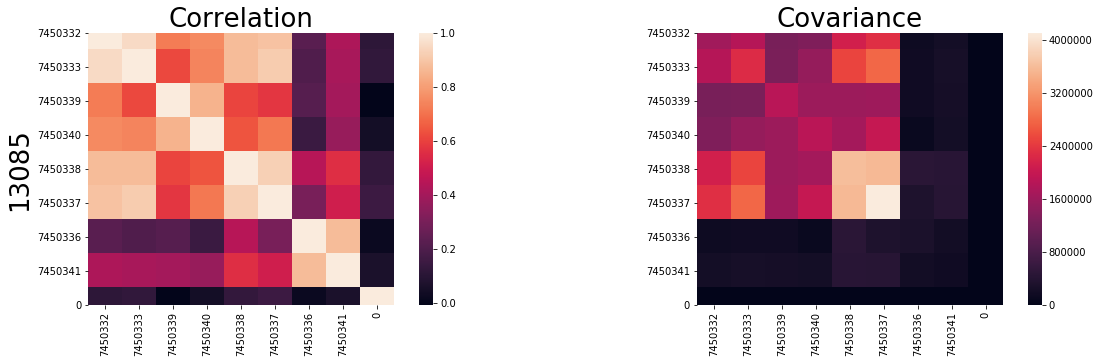

In [11]:
teste=bons_interpolados.loc[13085]
import seaborn as sns

fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
ax = sns.heatmap(teste.corr(),square=True)
ax.set_title('Correlation', fontsize=26)
ax.set_ylabel('13085', fontsize=26)#, title='corr')#uniform_data, vmin=0, vmax=1)
#ax.title('Correlation', fontsize=26)


plt.subplot(1, 2, 2)
ax = sns.heatmap(teste.cov(),square=True)#uniform_data, vmin=0, vmax=1)
ax.set_title('Covariance', fontsize=26)

Text(0.5, 1, 'Covariance')

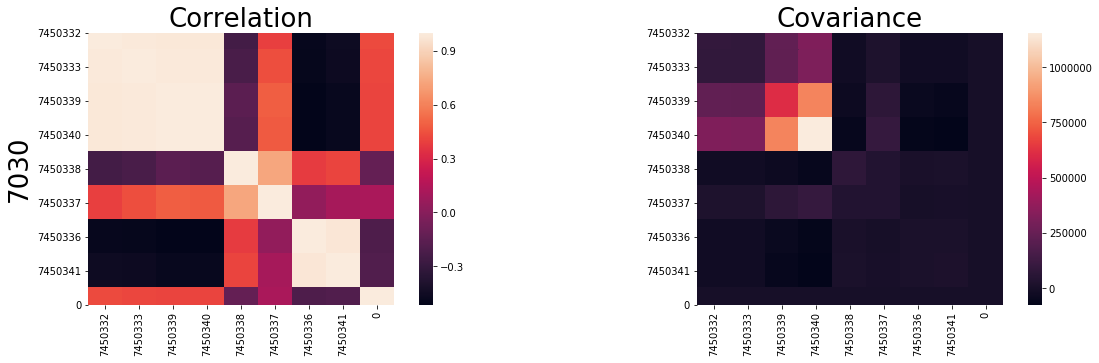

In [62]:
teste=bons_interpolados.loc[7030]
import seaborn as sns

fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
ax = sns.heatmap(teste.corr(),square=True)
ax.set_title('Correlation', fontsize=26)
ax.set_ylabel('7030', fontsize=26)#, title='corr')#uniform_data, vmin=0, vmax=1)
#ax.title('Correlation', fontsize=26)


plt.subplot(1, 2, 2)
ax = sns.heatmap(teste.cov(),square=True)#uniform_data, vmin=0, vmax=1)
ax.set_title('Covariance', fontsize=26)

In [ ]:
teste.head(2)

In [64]:
from scipy.stats import ttest_ind

#cat1 = my_data[my_data['Category']=='cat1']
#cat2 = my_data[my_data['Category']=='cat2']
teste=bons_interpolados.loc[13085]
ttest_ind(teste['7450332'], teste['7450333'])

Ttest_indResult(statistic=-2.2495906007379523, pvalue=0.02575806890749873)

In [65]:
teste=bons_interpolados.loc[13076]
ttest_ind(teste['7450332'], teste['7450333'])

Ttest_indResult(statistic=0.16630683138405708, pvalue=0.86805435358535)

In [61]:
teste=bons_interpolados.loc[7030]
ttest_ind(teste['7450332'], teste['7450333'])

Ttest_indResult(statistic=1.1367315767462163, pvalue=0.2558490123702351)

In [68]:
ttest_ind(bons_interpolados.loc[13076]['7450332'], bons_interpolados.loc[7030]['7450332'])#,  equal_var=False)

Ttest_indResult(statistic=-9.143904864760396, pvalue=4.80161506037816e-19)

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(*my_data.groupby('Category')['value'].apply(lambda x:list(x)))

We can test the hypothesis that two independent unequal-sized samples are drawn from the same distribution with computing the Wilcoxon rank-sum statistic

- Null hypothesis that two sets of measurements are drawn from the same distribution.
- The alternative hypothesis is that values in one sample are more likely to be larger than the values in the other sample.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html

In [69]:
from scipy.stats import ranksums
sample1 = np.random.uniform(-1, 1, 200)
sample2 = np.random.uniform(-0.5, 1.5, 300) # a shifted distribution
ranksums(sample1, sample2)
#RanksumsResult(statistic=-7.887059, pvalue=3.09390448e-15)

RanksumsResult(statistic=-6.421227551913504, pvalue=1.3517977882173586e-10)

In [73]:
teste=bons_interpolados.loc[7030]
ranksums(teste['7450332'], teste['7450333'])

RanksumsResult(statistic=25.856839560506085, pvalue=2.038218154138701e-147)

In [71]:
teste=bons_interpolados.loc[13076]
ranksums(teste['7450332'], teste['7450333'])

RanksumsResult(statistic=-5.4965524772873415, pvalue=3.872878816311597e-08)

In [72]:
ranksums(bons_interpolados.loc[13076]['7450332'], bons_interpolados.loc[7030]['7450332'])

RanksumsResult(statistic=8.414411076558643, pvalue=3.9487368613666175e-17)

In [ ]:
ranksums(teste['7450332'], bons_interpolados.loc[3023]['7450332'])

In [ ]:
ranksums(teste['7450332'], bons_interpolados.loc[13076]['7450332'])

The p-value of less than 0.05 indicates that this test rejects the hypothesis at the 5% significance leve

In [ ]:
sample1 = np.random.uniform(-1, 1, 200)
plt.plot(sample1)

In [ ]:
sample2 = np.random.uniform(-0.5, 1.5, 300)
plt.plot(sample2)

The Chow Test tests if the true coefficients in two different regression models are equal. The null hypothesis is they are equal and the alternative hypothesis is they are not

The Chow Test and returned a p-value of approximately 0.0009. We can reject the null hypothesis that the pre-Euro and post-Euro models are the same.

https://towardsdatascience.com/the-time-series-they-are-a-changing-why-all-good-models-eventually-fail-24a96a5f48d3

https://gist.github.com/jkclem/49aa838585a8311e87e583c3e322309b

In [77]:
bons_interpolados


7450332  7450333  7450339  7450340  7450338  7450337  7450336  \
measurement                                                                  
2                0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2             -860.0      0.0      0.0      0.0      0.0      0.0      0.0   
2                0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2               10.0      0.0      0.0      0.0      0.0      0.0      0.0   
2               80.0      0.0      0.0      0.0      0.0      0.0      0.0   
...              ...      ...      ...      ...      ...      ...      ...   
13103            0.0      0.0      0.0      0.0      0.0      0.0     10.0   
13103            0.0      0.0      0.0      0.0      0.0     10.0    -10.0   
13103            0.0      0.0      0.0      0.0      0.0      0.0     10.0   
13103          -10.0      0.0      0.0      0.0      0.0      0.0      0.0   
13103            0.0      0.0      0.0      0.0      0.0      0.0      0.0   

             7450341  0           timestamp   period  
measurement                                           
2                0.0  0 2019-05-09 14:30:40 00:07:36  
2                0.0  7 2019-05-09 14:30:43 00:00:03  
2                0.0  0 2019-05-09 14:30:46 00:00:03  
2                0.0  0 2019-05-09 14:30:49 00:00:03  
2                0.0  0 2019-05-09 14:30:52 00:00:03  
...              ... ..                 ...      ...  
13103           10.0  0 2020-07-24 11:08:11 00:00:14  
13103           50.0  0 2020-07-24 11:08:13 00:00:02  
13103          -10.0  0 2020-07-24 11:08:15 00:00:02  
13103            0.0  0 2020-07-24 11:08:17 00:00:02  
13103            0.0  0 2020-07-24 11:08:19 00:00:02  

[247900 rows x 11 columns]

## ALTERNATIVA

In [4]:
#bons_interpolados_soma=
novos=pd.concat([bons_interpolados[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']].sum(axis=1).to_frame(), bons_interpolados[['0','timestamp','period']]], axis=1, sort=False).rename(columns={0: "peso"})

In [7]:
novos

peso  0           timestamp   period
measurement                                       
2              0.0  0 2019-05-09 14:30:40 00:07:36
2           -860.0  7 2019-05-09 14:30:43 00:00:03
2              0.0  0 2019-05-09 14:30:46 00:00:03
2             10.0  0 2019-05-09 14:30:49 00:00:03
2             80.0  0 2019-05-09 14:30:52 00:00:03
...            ... ..                 ...      ...
13103         20.0  0 2020-07-24 11:08:11 00:00:14
13103         50.0  0 2020-07-24 11:08:13 00:00:02
13103          0.0  0 2020-07-24 11:08:15 00:00:02
13103        -10.0  0 2020-07-24 11:08:17 00:00:02
13103          0.0  0 2020-07-24 11:08:19 00:00:02

[247900 rows x 4 columns]

Text(0, 0.5, 'Weight')

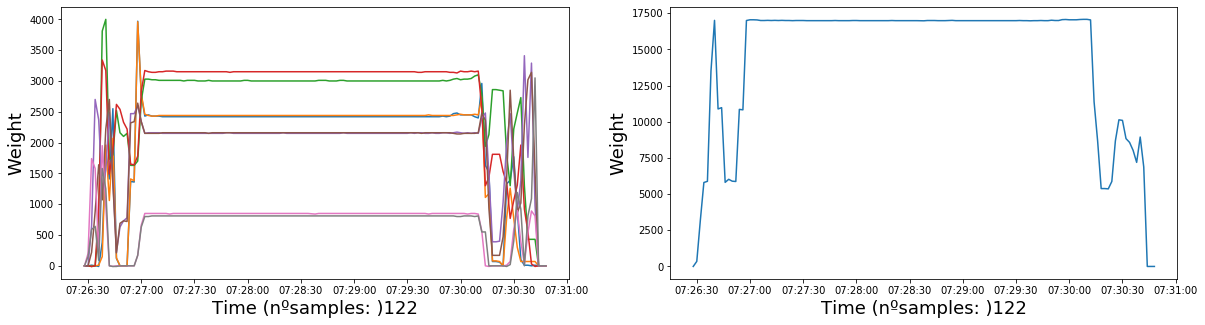

In [116]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))

teste=bons_interpolados.loc[13076]
plt.subplot(1, 2, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)


teste=novos.loc[13076]
plt.subplot(1, 2, 2)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)

In [6]:
#novos['diff2']=
novos_diff=pd.concat([novos.reset_index(), novos.reset_index().groupby('measurement')['peso'].diff().to_frame().rename(columns={'peso': "diff"})], axis=1, sort=False).set_index('measurement')#['peso']

In [141]:
novos_diff

peso  0           timestamp   period   diff
measurement                                              
2              0.0  0 2019-05-09 14:30:40 00:07:36    NaN
2           -860.0  7 2019-05-09 14:30:43 00:00:03 -860.0
2              0.0  0 2019-05-09 14:30:46 00:00:03  860.0
2             10.0  0 2019-05-09 14:30:49 00:00:03   10.0
2             80.0  0 2019-05-09 14:30:52 00:00:03   70.0
...            ... ..                 ...      ...    ...
13103         20.0  0 2020-07-24 11:08:11 00:00:14   20.0
13103         50.0  0 2020-07-24 11:08:13 00:00:02   30.0
13103          0.0  0 2020-07-24 11:08:15 00:00:02  -50.0
13103        -10.0  0 2020-07-24 11:08:17 00:00:02  -10.0
13103          0.0  0 2020-07-24 11:08:19 00:00:02   10.0

[247900 rows x 5 columns]

Text(0, 0.5, 'Weight Diff')

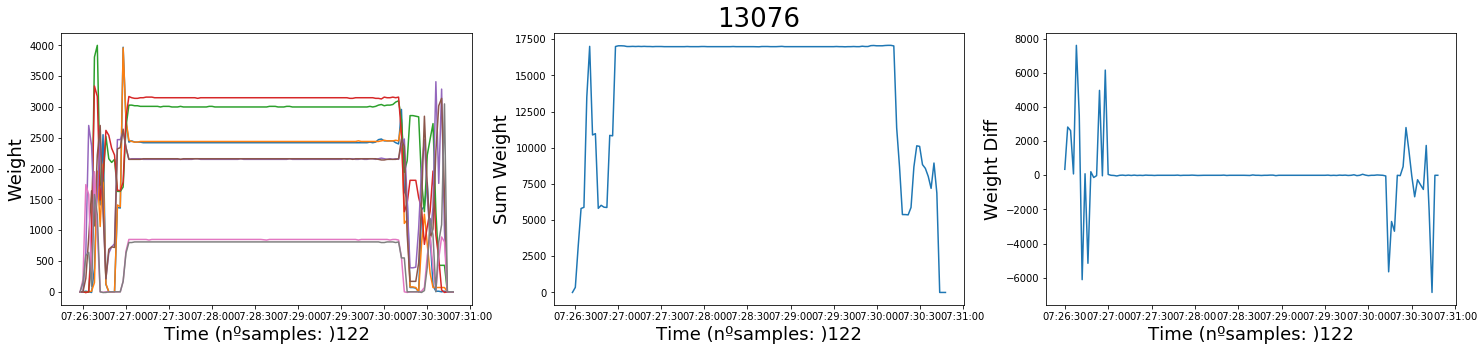

In [149]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,5))

teste=bons_interpolados.loc[13076]
plt.subplot(1, 3, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)


teste=novos.loc[13076]
plt.subplot(1, 3, 2)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Sum Weight', fontsize=18)
plt.title('13076', fontsize=26)

teste=novos_diff.loc[13076]
plt.subplot(1, 3, 3)
plt.plot(teste.timestamp, teste[['diff']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight Diff', fontsize=18)

Text(0, 0.5, 'Weight Diff')

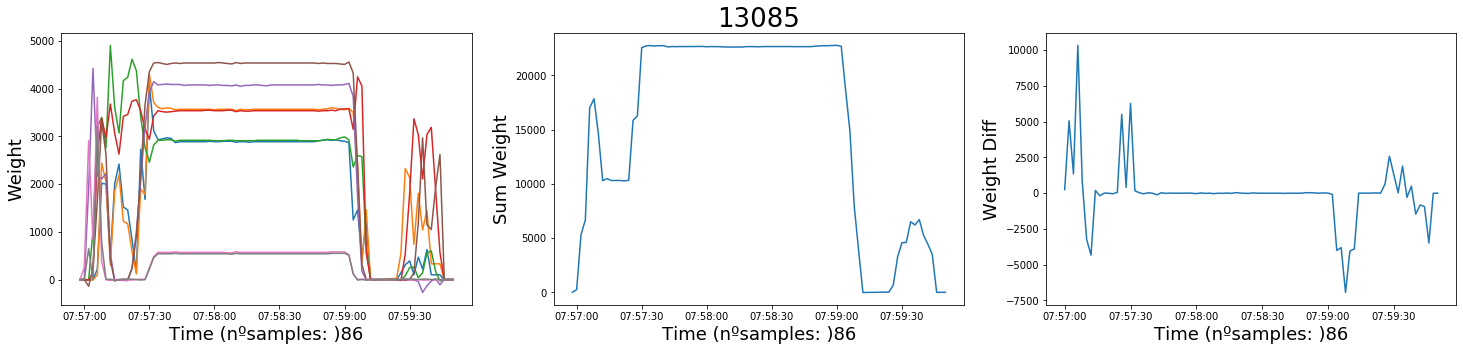

In [151]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,5))

teste=bons_interpolados.loc[13085]
plt.subplot(1, 3, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)


teste=novos.loc[13085]
plt.subplot(1, 3, 2)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Sum Weight', fontsize=18)
plt.title('13085', fontsize=26)

teste=novos_diff.loc[13085]
plt.subplot(1, 3, 3)
plt.plot(teste.timestamp, teste[['diff']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight Diff', fontsize=18)

Text(0, 0.5, 'Weight Diff')

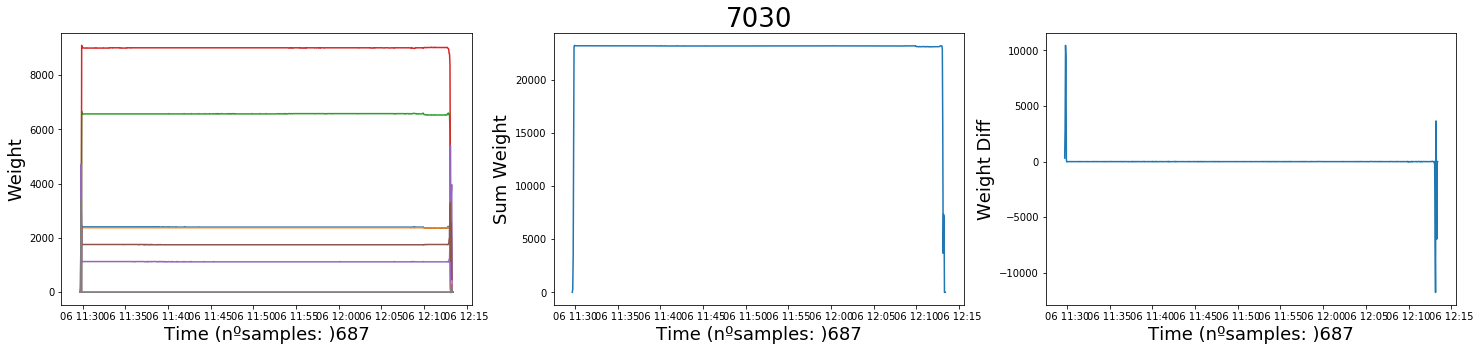

In [152]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,5))

teste=bons_interpolados.loc[7030]
plt.subplot(1, 3, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)


teste=novos.loc[7030]
plt.subplot(1, 3, 2)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Sum Weight', fontsize=18)
plt.title('7030', fontsize=26)

teste=novos_diff.loc[7030]
plt.subplot(1, 3, 3)
plt.plot(teste.timestamp, teste[['diff']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight Diff', fontsize=18)


Text(0, 0.5, 'Weight Diff')

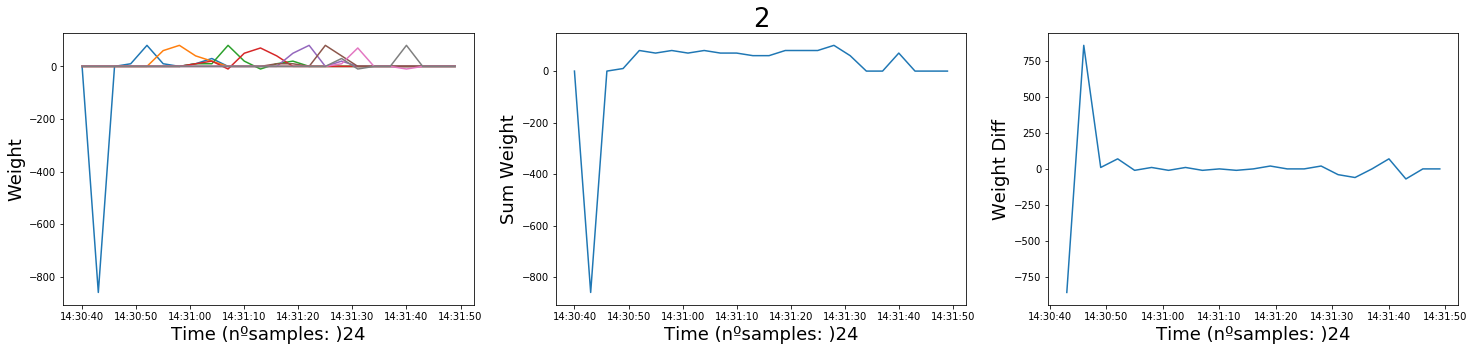

In [175]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,5))

teste=bons_interpolados.loc[2]
plt.subplot(1, 3, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)


teste=novos.loc[2]
plt.subplot(1, 3, 2)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Sum Weight', fontsize=18)
plt.title('2', fontsize=26)

teste=novos_diff.loc[2]
plt.subplot(1, 3, 3)
plt.plot(teste.timestamp, teste[['diff']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight Diff', fontsize=18)

Text(0, 0.5, 'Weight Diff')

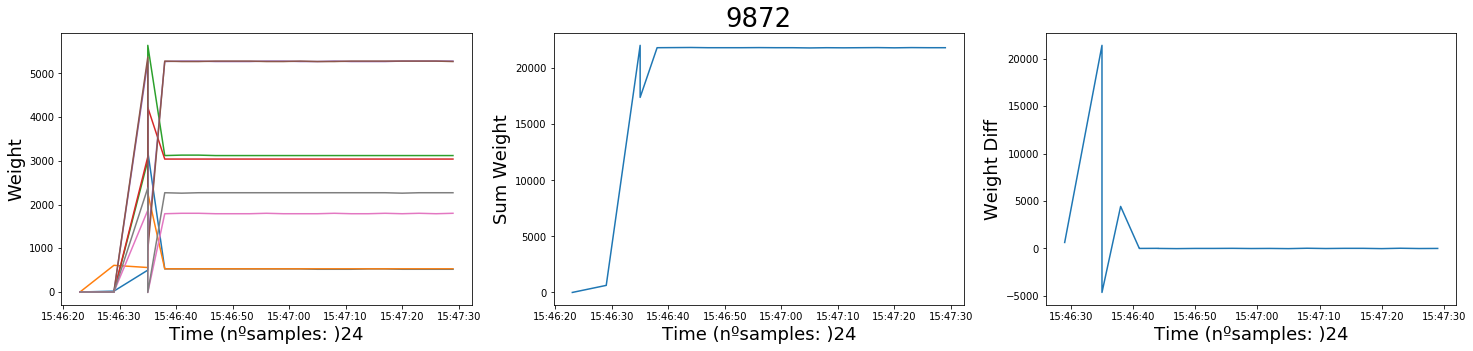

In [165]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,5))

teste=bons_interpolados.loc[8]
plt.subplot(1, 3, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)


teste=novos.loc[8]
plt.subplot(1, 3, 2)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Sum Weight', fontsize=18)
plt.title('9872', fontsize=26)

teste=novos_diff.loc[8]
plt.subplot(1, 3, 3)
plt.plot(teste.timestamp, teste[['diff']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight Diff', fontsize=18)

In [7]:
forcluster=novos_diff.reset_index().groupby('measurement')['diff'].mean().to_frame().rename(columns={"diff": "mean"})

In [8]:
forcluster['std']=novos_diff.reset_index().groupby('measurement')['diff'].std()
forcluster['meanpeso']=novos_diff.reset_index().groupby('measurement')['peso'].mean()
forcluster['stdpeso']=novos_diff.reset_index().groupby('measurement')['peso'].std()

In [9]:
forcluster['max']=novos_diff.reset_index().groupby('measurement')['peso'].max()
forcluster['min']=novos_diff.reset_index().groupby('measurement')['peso'].min()

In [10]:
forcluster['mediandiff']=novos_diff.reset_index().groupby('measurement')['diff'].median()
forcluster['medianpeso']=novos_diff.reset_index().groupby('measurement')['peso'].median()

In [11]:
forcluster['counts']=novos_diff.reset_index().groupby('measurement')['peso'].count()#['peso'].min()

In [12]:
forcluster

mean          std      meanpeso      stdpeso      max  \
measurement                                                                
2              0.000000   261.168702     10.833333   188.884981    100.0   
8            949.130435  4667.210490  19863.333333  6089.310425  22040.0   
16             0.000000   865.182062    762.500000  1035.463225   2180.0   
22             0.000000  4165.145513  27892.638889  8326.248837  31520.0   
23             0.000000  3756.886606  20529.264706  6865.129781  23080.0   
...                 ...          ...           ...          ...      ...   
13085          0.000000  2107.682659  15372.325581  8975.379222  22760.0   
13095        -12.500000    44.320263     76.666667    64.031242    160.0   
13097          0.000000  1358.970198    790.000000  1323.572606   3180.0   
13099          0.000000  5217.585649   3167.500000  4712.296225  10700.0   
13103          0.000000   442.191512    100.000000   289.620441    970.0   

               min  mediandiff  medianpeso  counts  
measurement                                         
2           -860.0         0.0        65.0      24  
8              0.0         0.0     21830.0      24  
16             0.0         0.0        30.0      12  
22             0.0         0.0     30480.0      72  
23             0.0         0.0     22810.0      68  
...            ...         ...         ...     ...  
13085        -10.0         0.0     22610.0      86  
13095          0.0         0.0        90.0       9  
13097        -10.0         0.0        10.0      10  
13099          0.0         0.0       195.0       8  
13103        -10.0         5.0         0.0      11  

[3160 rows x 9 columns]

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
from sklearn import datasets

#X = Y #dataFinal
#KMeans
km = KMeans(n_clusters=3)
km.fit(forcluster)
km.predict(forcluster)
labels = km.labels_

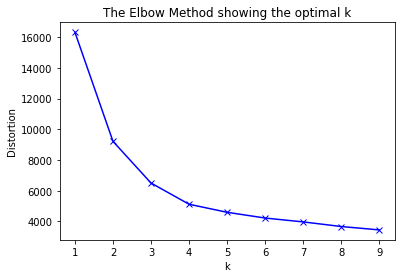

In [14]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k).fit(forcluster)
    km.fit(forcluster)
    distortions.append(sum(np.min(cdist(forcluster, km.cluster_centers_, 'euclidean'), axis=1)) / forcluster.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [24]:
forcluster['Kmeans_label']=labels#.value_counts()

In [37]:
forcluster.columns

Index(['mean', 'std', 'meanpeso', 'stdpeso', 'max', 'min', 'mediandiff',
       'medianpeso', 'counts', 'Kmeans_label'],
      dtype='object')

In [14]:
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

X=forcluster

trace = go.Scatter3d(
    x= X.values[:, 8],  
    y= X.values[:, 6],
    z= X.values[:, 0],  
    mode='markers',
    marker={
        'size': 10,
        'opacity': 0.8,
        'color': labels,
    }
)


In [16]:
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

In [22]:
forcluster['Kmeans_label'].value_counts()

0    2039
1    1121
Name: Kmeans_label, dtype: int64

In [25]:
class1=forcluster[forcluster['Kmeans_label']==1]
class1

mean          std      meanpeso       stdpeso      max  \
measurement                                                                  
22              0.000000  4165.145513  27892.638889   8326.248837  31520.0   
24           1985.238095  5927.844987  23229.090909  15732.983524  41800.0   
82             -0.185185  5364.977445  26098.727273  14867.364838  35500.0   
89              0.000000  1911.482647  37945.566343   4469.704440  44120.0   
93              0.000000  3962.989010  33518.604651   9372.745458  36640.0   
...                  ...          ...           ...           ...      ...   
13038           0.000000  3107.610642  29765.604839  11731.265418  45200.0   
13042           0.000000  4207.517369  35688.588235  14004.486709  44320.0   
13045          -0.038911  1615.918977  33118.410853   5390.698593  34440.0   
13046           0.000000  3223.364224  33373.750000  10220.495588  37330.0   
13047           0.000000  2625.602663  28813.495935  10116.711976  35430.0   

               min  mediandiff  medianpeso  counts  Kmeans_label  
measurement                                                       
22             0.0         0.0     30480.0      72             1  
24            40.0       250.0     18620.0      22             1  
82           -20.0         0.0     34800.0      55             1  
89           -20.0         0.0     38380.0     618             1  
93           -10.0         0.0     36170.0     129             1  
...            ...         ...         ...     ...           ...  
13038       -100.0         0.0     27970.0     248             1  
13042          0.0         0.0     44120.0      85             1  
13045        -20.0         0.0     34140.0     258             1  
13046          0.0         0.0     37120.0      80             1  
13047        -10.0         0.0     35240.0     246             1  

[298 rows x 10 columns]

In [54]:
class1.sort_values(by=['counts'],ascending=False).head(30)#.counts.max()

mean         std     meanpeso      stdpeso      max   min  \
measurement                                                                   
3023         -0.056856  707.801314  2007.766633  6097.350422  25660.0   0.0   
3014          3.214407  545.452366  2902.584918  6482.561910  19560.0  10.0   
10394         0.011648  442.496098   405.861467  1925.678072  12080.0 -10.0   
3013         14.809930  272.968752  3681.108527  7480.570038  19540.0   0.0   
13037         0.008475  534.402475   744.445385  3162.148481  15110.0 -20.0   
1356          0.010571  225.675001    51.256600   236.924455   4120.0  10.0   
1401          0.000000  434.740501    73.858633   483.104148   9270.0 -10.0   
5565          0.000000  242.787808    32.089915   267.885760   6810.0 -30.0   
6739          0.000000  566.232091    38.710462   484.691387  12200.0 -20.0   
1420          0.015504  240.510262    38.173375   251.497359   4460.0  10.0   
1560         16.930380  572.300173  1037.393365  3139.186281  10910.0 -10.0   
9872         -5.487603  430.122386  9098.069307  1236.081814   9940.0   0.0   
5357         -0.016978  449.057024    68.661017   553.500118   7050.0   0.0   
12866        -0.052817   32.888525    79.490334    45.096770    370.0 -40.0   
5224        -10.989011  321.102076  6433.784278   930.510776   9730.0   0.0   
3005         -0.019305  376.653543   103.063584   442.409227   6220.0  40.0   
9937          0.000000  811.614007  2598.257426  5143.734065  17010.0 -20.0   
3016        -27.804391  739.804548   989.820717  3156.940927  14020.0  10.0   
1857         -0.043011  213.302234    90.515021   512.850932   3770.0 -10.0   
10990         0.431965  937.202378   220.905172  1125.104478  12570.0 -70.0   
1723          0.208333   11.263687    50.369515    28.816986    110.0 -30.0   
11315         0.130890  720.866156  3730.156658  4847.886675  10280.0   0.0   
2994          0.246575  228.164425    92.896175   267.276113   3580.0   0.0   
12941        43.471074  441.446099  7302.142857  7859.672977  15860.0 -10.0   
13036         0.055402    9.219378    -0.828729    10.007114    130.0 -20.0   
1380         68.288288  720.300565   700.958084  3833.764211  22870.0 -10.0   
10318        11.974522  222.815098  3614.952381   605.995192   3850.0   0.0   
10006         0.000000  794.204490  7700.000000  4137.041167  10460.0 -30.0   
12606        12.240803  575.137564  7289.600000  1926.132861   8510.0   0.0   
2998          0.136054   13.244170    39.728814    19.411258    160.0   0.0   

             mediandiff  medianpeso  counts  Kmeans_label  
measurement                                                
3023                0.0        30.0    2991             1  
3014                0.0        40.0    2944             1  
10394               0.0        10.0    1718             1  
3013                0.0        50.0    1290             1  
13037               0.0         0.0    1181             1  
1356                0.0        30.0     947             1  
1401                0.0        20.0     863             1  
5565                0.0        20.0     823             1  
6739                0.0        10.0     822             1  
1420                0.0        20.0     646             1  
1560                0.0        20.0     633             1  
9872                0.0      9320.0     606             1  
5357                0.0        10.0     590             1  
12866               0.0        90.0     569             1  
5224                0.0      6520.0     547             1  
3005                0.0        50.0     519             1  
9937                0.0        20.0     505             1  
3016                0.0        30.0     502             1  
1857                0.0        10.0     466             1  
10990               0.0         0.0     464             1  
1723                0.0        60.0     433             1  
11315               0.0        70.0     383             1  
2994                0.0        90.0     366      

In [49]:
class1[class1.counts==2991]

mean         std     meanpeso      stdpeso      max  min  \
measurement                                                                 
3023        -0.056856  707.801314  2007.766633  6097.350422  25660.0  0.0   

             mediandiff  medianpeso  counts  Kmeans_label  
measurement                                                
3023                0.0        30.0    2991             1

Text(0, 0.5, 'Weight Diff')

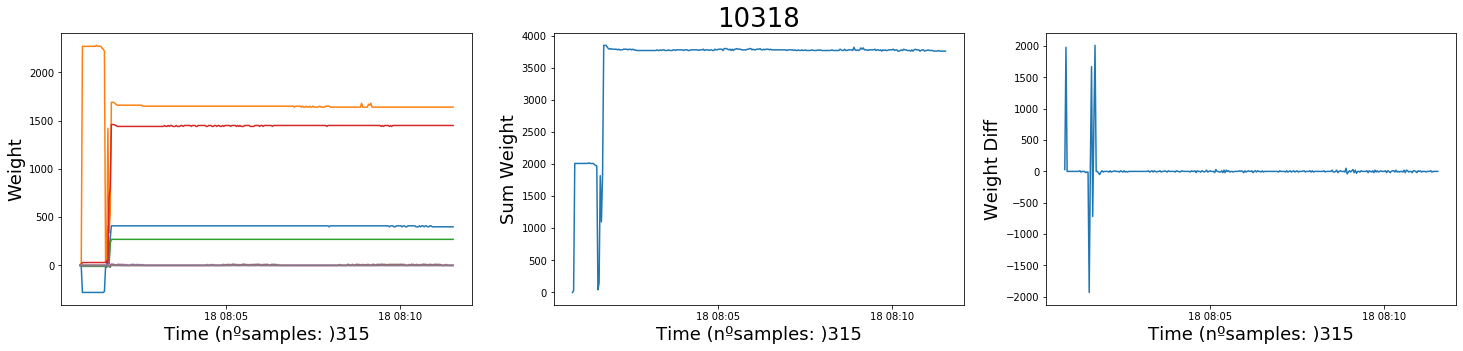

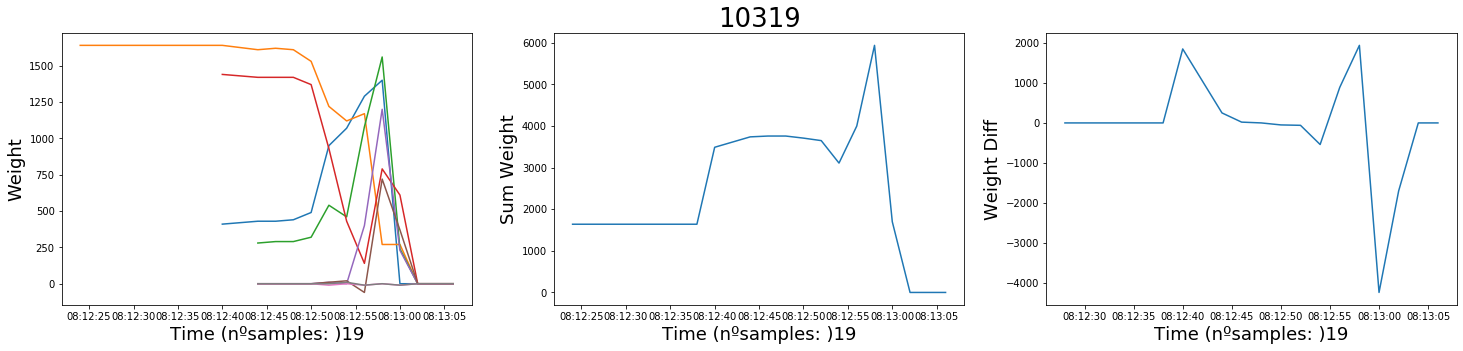

In [88]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,5))

teste=bons_interpolados.loc[10318]#[125:135]#[570:590]#2998[170:190]
plt.subplot(1, 3, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)
#plt.legend(['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341'])

teste=novos.loc[10318]
plt.subplot(1, 3, 2)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Sum Weight', fontsize=18)
plt.title('10318', fontsize=26)

teste=novos_diff.loc[10318]
plt.subplot(1, 3, 3)
plt.plot(teste.timestamp, teste[['diff']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight Diff', fontsize=18)


fig = plt.figure(figsize=(25,5))

teste=bons_interpolados.loc[10319]#[125:135]#[570:590]#2998[170:190]
plt.subplot(1, 3, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)
#plt.legend(['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341'])

teste=novos.loc[10319]
plt.subplot(1, 3, 2)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Sum Weight', fontsize=18)
plt.title('10319', fontsize=26)

teste=novos_diff.loc[10319]
plt.subplot(1, 3, 3)
plt.plot(teste.timestamp, teste[['diff']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight Diff', fontsize=18)

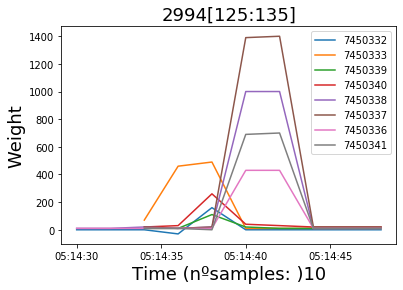

In [83]:
teste=bons_interpolados.loc[2994][125:135]#[570:590]#2998[170:190]

plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
plt.title('2994[125:135]', fontsize=18)
plt.legend(['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341'])

In [36]:
class2=forcluster[forcluster['Kmeans_label']==2]
class2#.loc[13085]

mean          std      meanpeso      stdpeso      max  \
measurement                                                                
8            949.130435  4667.210490  19863.333333  6089.310425  22040.0   
23             0.000000  3756.886606  20529.264706  6865.129781  23080.0   
27             0.465116  2405.990493  10588.636364  4392.515617  12580.0   
28             0.000000  3281.890392  21265.434783  8776.418330  25440.0   
31            -0.217391  1919.216842   9491.489362  3344.983251  10820.0   
...                 ...          ...           ...          ...      ...   
13049          0.000000  2118.988977  15800.923077  4813.481304  17950.0   
13053         -0.361446  2837.905207  17805.357143  6694.300659  21010.0   
13060          0.000000  1419.599541   9834.166667  2814.503559  12260.0   
13076          0.000000  1658.096298  14299.098361  4908.944443  17070.0   
13085          0.000000  2107.682659  15372.325581  8975.379222  22760.0   

              min  mediandiff  medianpeso  counts  Kmeans_label  
measurement                                                      
8             0.0         0.0     21830.0      24             2  
23            0.0         0.0     22810.0      68             2  
27          -20.0         0.0     12440.0      44             2  
28            0.0         0.0     25320.0      46             2  
31          -10.0         0.0     10730.0      47             2  
...           ...         ...         ...     ...           ...  
13049       -10.0         0.0     17390.0      65             2  
13053         0.0         0.0     20870.0      84             2  
13060         0.0         0.0     10650.0      72             2  
13076         0.0         0.0     16980.0     122             2  
13085       -10.0         0.0     22610.0      86             2  

[1254 rows x 10 columns]

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



Text(0, 0.5, 'Weight Diff')

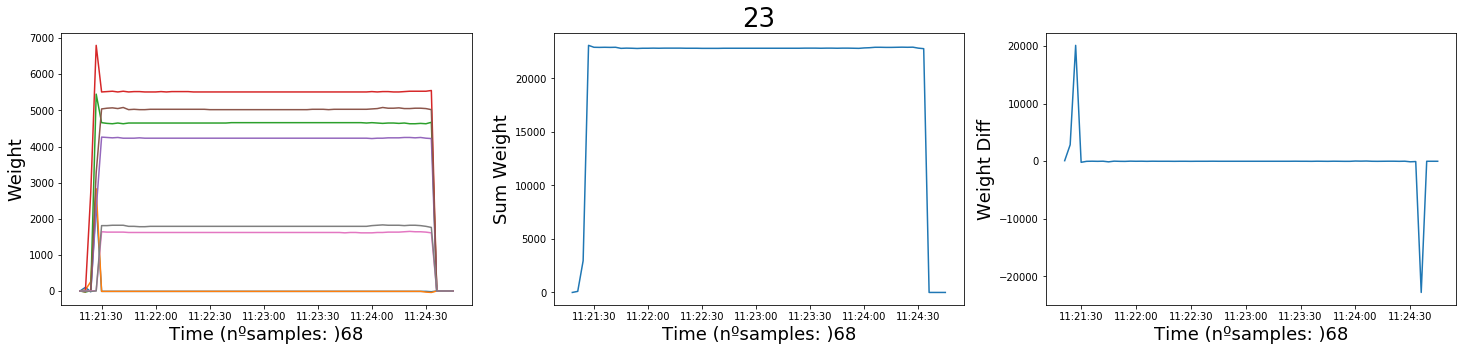

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,5))

teste=bons_interpolados.loc[23]#[125:135]#[570:590]#2998[170:190]
plt.subplot(1, 3, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)
#plt.legend(['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341'])

teste=novos.loc[23]
plt.subplot(1, 3, 2)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Sum Weight', fontsize=18)
plt.title('23', fontsize=26)

teste=novos_diff.loc[23]
plt.subplot(1, 3, 3)
plt.plot(teste.timestamp, teste[['diff']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight Diff', fontsize=18)

Text(0, 0.5, 'Weight Diff')

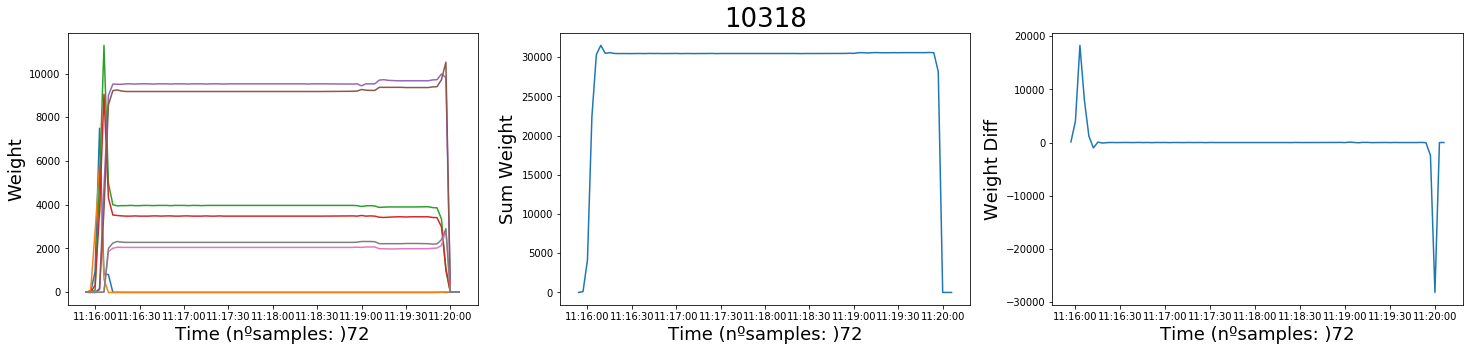

In [94]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,5))

teste=bons_interpolados.loc[22]#[125:135]#[570:590]#2998[170:190]
plt.subplot(1, 3, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)
#plt.legend(['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341'])

teste=novos.loc[22]
plt.subplot(1, 3, 2)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Sum Weight', fontsize=18)
plt.title('10318', fontsize=26)

teste=novos_diff.loc[22]
plt.subplot(1, 3, 3)
plt.plot(teste.timestamp, teste[['diff']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight Diff', fontsize=18)

Text(0, 0.5, 'Weight Diff')

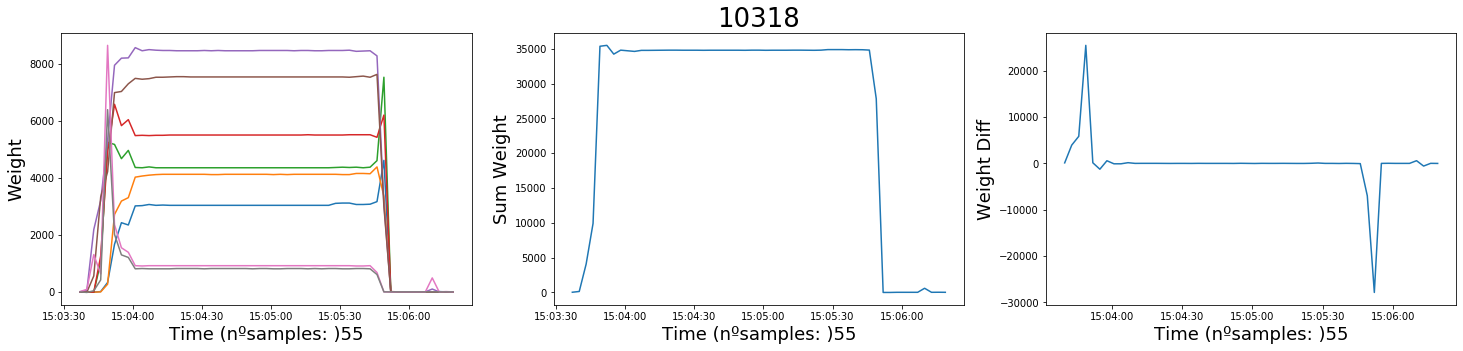

In [97]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,5))

teste=bons_interpolados.loc[82]#[125:135]#[570:590]#2998[170:190]
plt.subplot(1, 3, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)
#plt.legend(['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341'])

teste=novos.loc[82]
plt.subplot(1, 3, 2)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Sum Weight', fontsize=18)
plt.title('10318', fontsize=26)

teste=novos_diff.loc[82]
plt.subplot(1, 3, 3)
plt.plot(teste.timestamp, teste[['diff']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight Diff', fontsize=18)

Text(0, 0.5, 'Weight Diff')

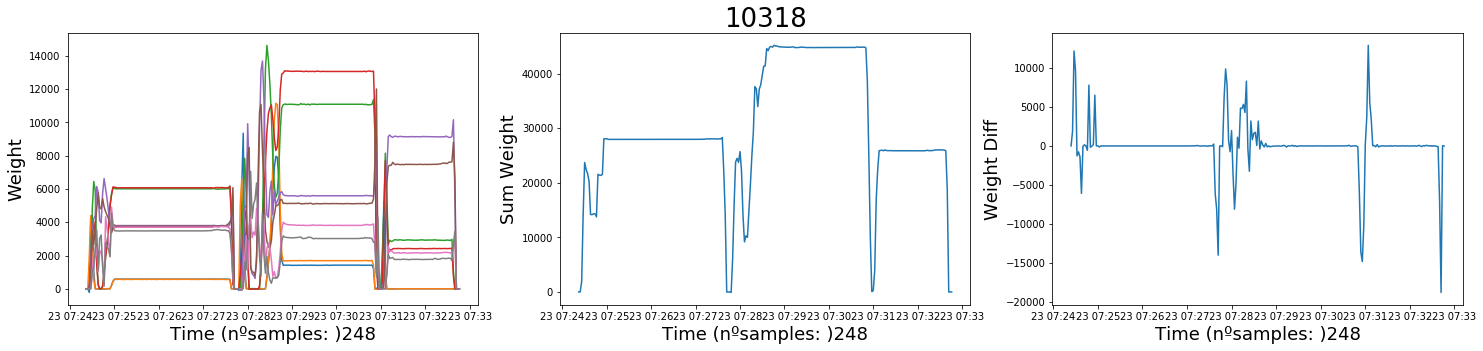

In [98]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,5))

teste=bons_interpolados.loc[13038]#[125:135]#[570:590]#2998[170:190]
plt.subplot(1, 3, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)
#plt.legend(['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341'])

teste=novos.loc[13038]
plt.subplot(1, 3, 2)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Sum Weight', fontsize=18)
plt.title('10318', fontsize=26)

teste=novos_diff.loc[13038]
plt.subplot(1, 3, 3)
plt.plot(teste.timestamp, teste[['diff']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight Diff', fontsize=18)

Text(0, 0.5, 'Weight Diff')

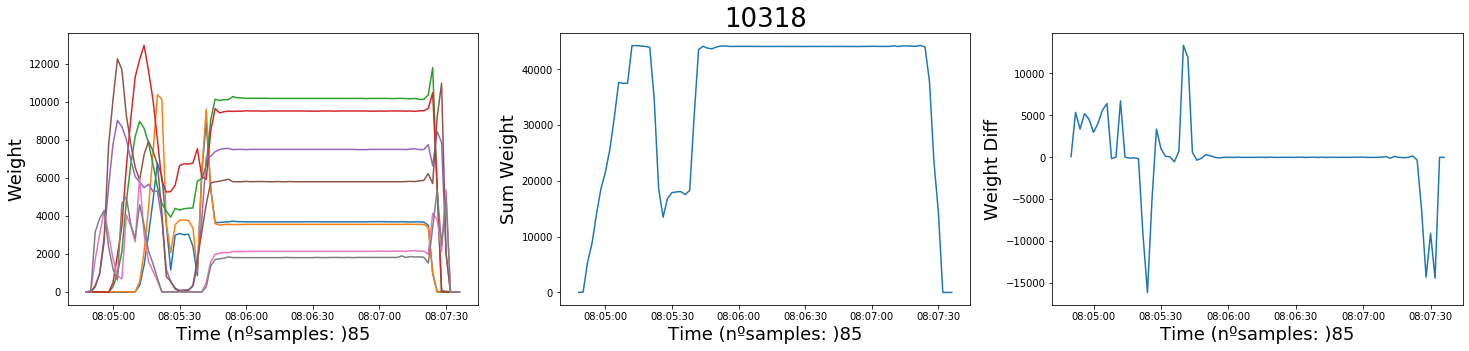

In [99]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,5))

teste=bons_interpolados.loc[13042]#[125:135]#[570:590]#2998[170:190]
plt.subplot(1, 3, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)
#plt.legend(['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341'])

teste=novos.loc[13042]
plt.subplot(1, 3, 2)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Sum Weight', fontsize=18)
plt.title('10318', fontsize=26)

teste=novos_diff.loc[13042]
plt.subplot(1, 3, 3)
plt.plot(teste.timestamp, teste[['diff']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight Diff', fontsize=18)

Text(0, 0.5, 'Weight Diff')

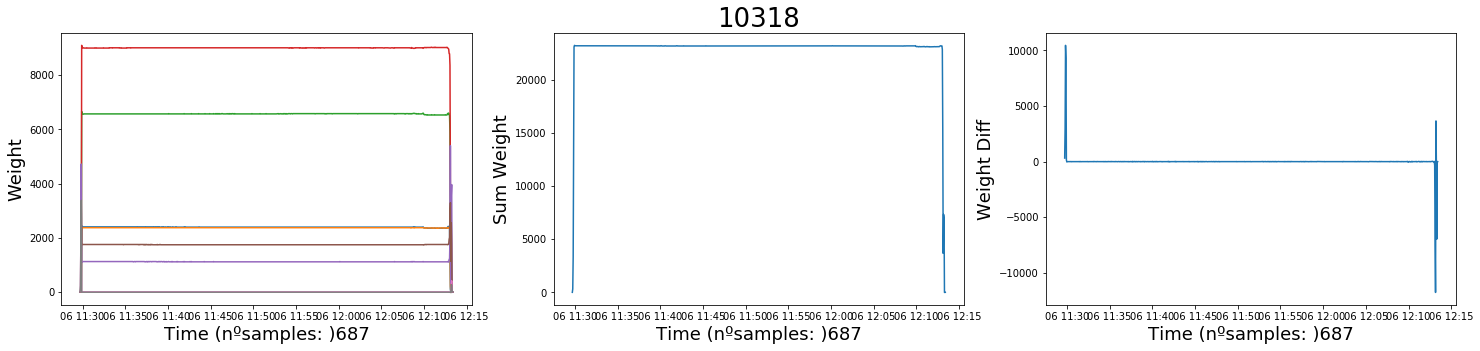

In [96]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,5))

teste=bons_interpolados.loc[7030]#[125:135]#[570:590]#2998[170:190]
plt.subplot(1, 3, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)
#plt.legend(['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341'])

teste=novos.loc[7030]
plt.subplot(1, 3, 2)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Sum Weight', fontsize=18)
plt.title('10318', fontsize=26)

teste=novos_diff.loc[7030]
plt.subplot(1, 3, 3)
plt.plot(teste.timestamp, teste[['diff']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight Diff', fontsize=18)

Text(0, 0.5, 'Weight Diff')

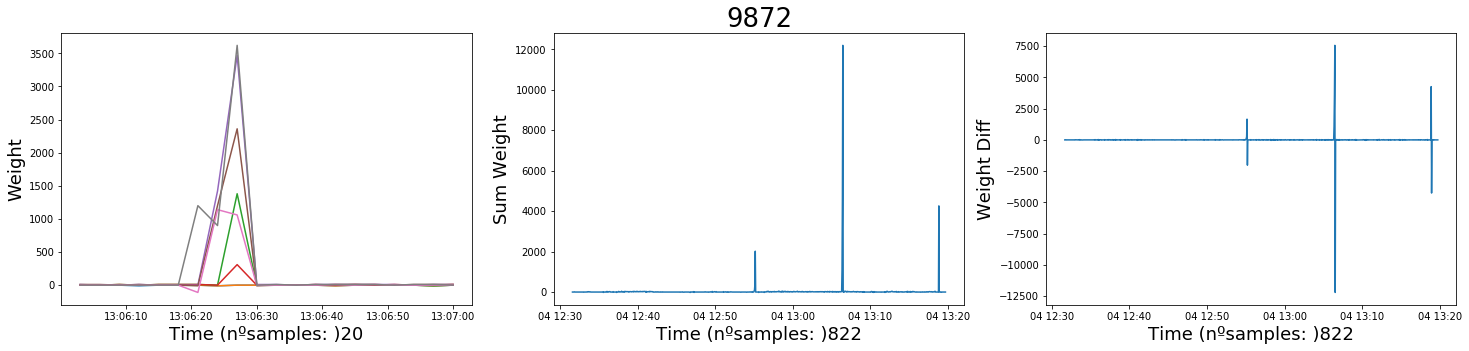

In [67]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,5))

teste=bons_interpolados.loc[6739][570:590]#2998[170:190]
plt.subplot(1, 3, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)


teste=novos.loc[6739]
plt.subplot(1, 3, 2)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Sum Weight', fontsize=18)
plt.title('9872', fontsize=26)

teste=novos_diff.loc[6739]
plt.subplot(1, 3, 3)
plt.plot(teste.timestamp, teste[['diff']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight Diff', fontsize=18)

In [31]:
class0=forcluster[forcluster['Kmeans_label']==0]
class0

mean          std     meanpeso      stdpeso      max    min  \
measurement                                                                     
2             0.000000   261.168702    10.833333   188.884981    100.0 -860.0   
16            0.000000   865.182062   762.500000  1035.463225   2180.0    0.0   
58           -3.333333    27.838822    46.000000    37.771241     90.0    0.0   
60           -0.769231    32.522182    75.714286    54.308844    150.0    0.0   
72            0.000000   877.964818   702.727273   976.474177   2310.0  -10.0   
...                ...          ...          ...          ...      ...    ...   
13075        -5.833333  1750.202369   460.769231  1103.112729   3570.0    0.0   
13095       -12.500000    44.320263    76.666667    64.031242    160.0    0.0   
13097         0.000000  1358.970198   790.000000  1323.572606   3180.0  -10.0   
13099         0.000000  5217.585649  3167.500000  4712.296225  10700.0    0.0   
13103         0.000000   442.191512   100.000000   289.620441    970.0  -10.0   

             mediandiff  medianpeso  counts  Kmeans_label  
measurement                                                
2                   0.0        65.0      24             0  
16                  0.0        30.0      12             0  
58                  0.0        50.0      10             0  
60                  0.0        90.0      14             0  
72                  0.0         0.0      11             0  
...                 ...         ...     ...           ...  
13075               0.0         0.0      13             0  
13095               0.0        90.0       9             0  
13097               0.0        10.0      10             0  
13099               0.0       195.0       8             0  
13103               5.0         0.0      11             0  

[1608 rows x 10 columns]

In [40]:
class0.sort_values(by=['counts'],ascending=False)#.max()

mean          std     meanpeso      stdpeso      max   min  \
measurement                                                                     
3023          -0.056856   707.801314  2007.766633  6097.350422  25660.0   0.0   
3014           3.214407   545.452366  2902.584918  6482.561910  19560.0  10.0   
10394          0.011648   442.496098   405.861467  1925.678072  12080.0 -10.0   
3013          14.809930   272.968752  3681.108527  7480.570038  19540.0   0.0   
13037          0.008475   534.402475   744.445385  3162.148481  15110.0 -20.0   
...                 ...          ...          ...          ...      ...   ...   
11036        -12.000000    61.400326    40.000000    53.665631    110.0 -10.0   
11094          2.000000   474.415430   196.666667   327.821089    770.0 -10.0   
9699         -10.000000   475.867629   215.000000   334.350116    800.0 -10.0   
325          678.000000  1516.087069  2821.666667  1382.337392   3390.0   0.0   
3389          -2.000000  1970.753663  1158.333333  1507.121981   3270.0   0.0   

             mediandiff  medianpeso  counts  Kmeans_label  
measurement                                                
3023                0.0        30.0    2991             0  
3014                0.0        40.0    2944             0  
10394               0.0        10.0    1718             0  
3013                0.0        50.0    1290             0  
13037               0.0         0.0    1181             0  
...                 ...         ...     ...           ...  
11036              10.0        30.0       6             0  
11094               0.0         0.0       6             0  
9699               10.0        30.0       6             0  
325                10.0      3385.0       6             0  
3389              440.0       425.0       6             0  

[1608 rows x 10 columns]

Text(0, 0.5, 'Weight Diff')

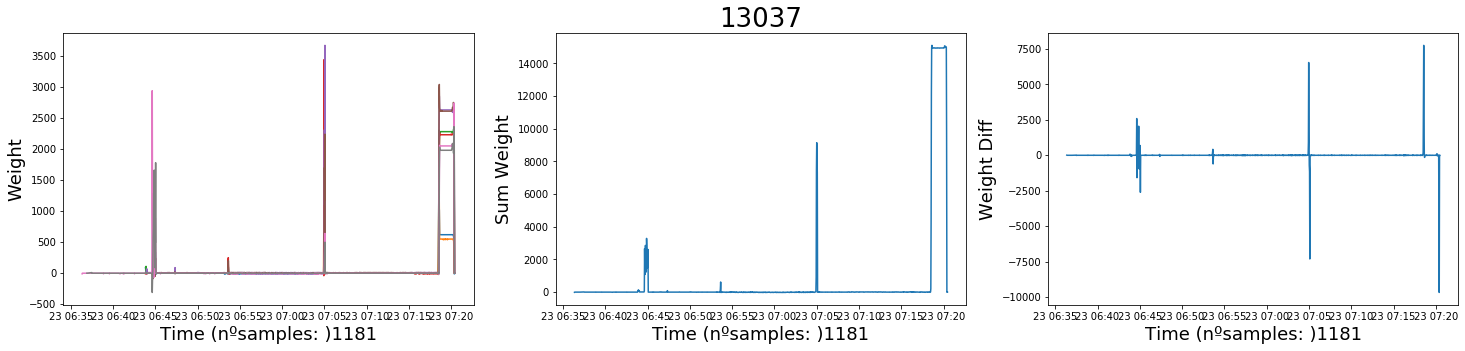

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,5))

teste=bons_interpolados.loc[13037]#[570:590]#2998[170:190]
plt.subplot(1, 3, 1)
plt.plot(teste.timestamp, teste[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)


teste=novos.loc[13037]
plt.subplot(1, 3, 2)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Sum Weight', fontsize=18)
plt.title('13037', fontsize=26)

teste=novos_diff.loc[13037]
plt.subplot(1, 3, 3)
plt.plot(teste.timestamp, teste[['diff']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight Diff', fontsize=18)

In [182]:
novos_diff

peso  0           timestamp   period   diff
measurement                                              
2              0.0  0 2019-05-09 14:30:40 00:07:36    NaN
2           -860.0  7 2019-05-09 14:30:43 00:00:03 -860.0
2              0.0  0 2019-05-09 14:30:46 00:00:03  860.0
2             10.0  0 2019-05-09 14:30:49 00:00:03   10.0
2             80.0  0 2019-05-09 14:30:52 00:00:03   70.0
...            ... ..                 ...      ...    ...
13103         20.0  0 2020-07-24 11:08:11 00:00:14   20.0
13103         50.0  0 2020-07-24 11:08:13 00:00:02   30.0
13103          0.0  0 2020-07-24 11:08:15 00:00:02  -50.0
13103        -10.0  0 2020-07-24 11:08:17 00:00:02  -10.0
13103          0.0  0 2020-07-24 11:08:19 00:00:02   10.0

[247900 rows x 5 columns]

In [153]:
bons.reset_index().measurement.value_counts().head(60)

3023     2991
3014     2944
10738    1782
10394    1718
5076     1717
10880    1377
3013     1290
13030    1269
3218     1223
2956     1200
13037    1181
8614     1123
10324    1116
12827     965
4765      961
1356      947
10385     936
11883     913
3378      908
12669     882
11251     871
1401      863
2851      832
5565      823
6739      822
1572      805
4694      801
12980     792
3360      790
3243      743
12954     708
7030      687
9761      679
3134      674
173       670
11254     664
4390      649
1573      649
12950     647
1420      646
1989      640
8519      634
1560      633
1986      624
89        618
4735      614
9872      606
8137      603
5357      590
6515      572
5083      570
12866     569
5084      563
5224      547
10371     542
3651      523
3005      519
8592      513
2952      507
9937      505
Name: measurement, dtype: int64

Text(0, 0.5, 'Weight')

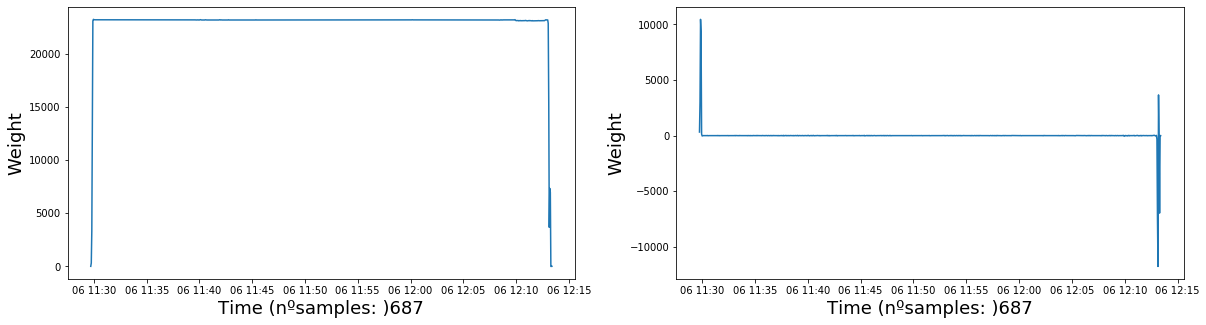

In [144]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))

teste=novos.loc[7030]
plt.subplot(1, 2, 1)
plt.plot(teste.timestamp, teste[['peso']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.title('Processed Data Retrieved', fontsize=26)


teste=novos_diff.loc[7030]
plt.subplot(1, 2, 2)
plt.plot(teste.timestamp, teste[['diff']])
plt.xlabel('Time (nºsamples: )'+str(teste.shape[0]), fontsize=18)
plt.ylabel('Weight', fontsize=18)

In [130]:
novos

peso  0           timestamp   period   diff  diff2
measurement                                                     
2              0.0  0 2019-05-09 14:30:40 00:07:36  860.0  860.0
2           -860.0  7 2019-05-09 14:30:43 00:00:03  860.0  860.0
2              0.0  0 2019-05-09 14:30:46 00:00:03  860.0  860.0
2             10.0  0 2019-05-09 14:30:49 00:00:03  860.0  860.0
2             80.0  0 2019-05-09 14:30:52 00:00:03  860.0  860.0
...            ... ..                 ...      ...    ...    ...
13103         20.0  0 2020-07-24 11:08:11 00:00:14    0.0    0.0
13103         50.0  0 2020-07-24 11:08:13 00:00:02    0.0    0.0
13103          0.0  0 2020-07-24 11:08:15 00:00:02    0.0    0.0
13103        -10.0  0 2020-07-24 11:08:17 00:00:02    0.0    0.0
13103          0.0  0 2020-07-24 11:08:19 00:00:02    0.0    0.0

[247900 rows x 6 columns]